## We determined that the NIST data for Guaiacol (2-methoxyphenol) had 18 values that were zero in the transmittance data and therefore infinity when we calculated the absorbance data. 

#### We confirmed this by checking the same regions on the NIST IR spectrum for the Guaiacol solution. The link to the NIST spectra at the time of this writing can be found here:
https://webbook.nist.gov/cgi/cbook.cgi?ID=C90051&Units=SI&Type=IR-SPEC&Index=1#IR-SPEC

In [31]:
# %matplotlib notebook
%matplotlib inline
%matplotlib tk
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
os.getcwd()

'C:\\Users\\manolis\\Desktop\\PycharmProjects\\IRAS\\IRAS\\GUA work\\Pt(100)\\IR chamber\\IR data\\GUA IR'

In [33]:
os.chdir('C:\\Users\\manolis\\Desktop\\PycharmProjects\\IRAS\\IRAS\\ref IR spectra')

In [34]:
os.listdir()

['.ipynb_checkpoints',
 '108-24-7-IR_HOAc_anhydride.jdx',
 '64-19-7-IR_HOAc.jdx',
 'anisole IR_solution.jdx',
 'benzene IR_solution.jdx',
 'catechol IR_solution.jdx',
 'guaiacol IR_solution.jdx',
 'phenol IR_solution.jdx']

In [35]:
nist = pd.read_csv( 'guaiacol IR_solution.jdx', sep=' ', skiprows=36, skipfooter=1, header=None, index_col=0, engine='python' )

In [36]:
nist.head()

,1,2,3,4,5
0,,,,,
603.97300,0.793,0.793,0.793,0.793,0.793
608.00776,0.793,0.793,0.793,0.793,0.793
612.04252,0.793,0.793,0.793,0.793,0.793
616.07728,0.792,0.792,0.792,0.792,0.792
620.11204,0.791,0.791,0.791,0.790,0.790


In [37]:
dx = 0.806952
wave = np.concatenate(np.array(list(map(lambda x: np.array(x)+dx*np.array([0,1,2,3,4]), nist.index.values))))
wave = wave.reshape((len(wave), 1))

In [38]:
nist = np.ndarray.flatten(nist.values)
nist = nist.reshape((len(nist),1))

In [39]:
# rm nans
nist = nist[~np.isnan(nist)]
wave= wave[:len(nist)]

<IPython.core.display.Javascript object>


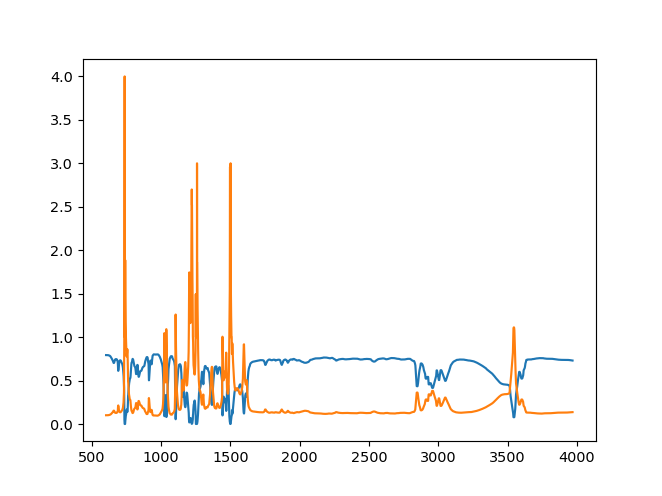

In [40]:
plt.plot(wave,nist)


In [41]:
nist_absorb = 2 - np.log10(nist*100)
# rm nan vals
# nist_absorb = nist_absorb[~np.isnan(nist_absorb)]
# nist_absorb = nist_absorb.reshape((len(nist_absorb),1))

# wave = wave[:len(nist_absorb)]

C:\Users\manolis\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [42]:
# rm nan values
np.sum(~np.isnan(nist_absorb))
nist_absorb = nist_absorb[~np.isnan(nist_absorb)]
# replace inf values with an absorbance of 1
nist_absorb[np.where(nist_absorb == np.inf)] = 1

In [43]:
nist_absorb = nist_absorb.reshape((len(nist_absorb),1))
wave = wave[:len(nist_absorb)]

In [44]:
# plt.figure(figsize=(12, 12))
plt.plot(wave[::-1], nist_absorb[::-1], label='nist')
plt.show()
# plt.legend()

In [45]:
def normalize_wrt(X, x_max_val):
    """
    Leaving this as a function in case i need it in the future... Normalizes with respect to the value you want. Not
    necessarily the max value in the column
    :param X:
    :param x_max_val:
    :return:
    """
    # TODO may need to fix normalization
    x_norm = (X - X.min(axis=0)) / float((x_max_val.values - X.min(axis=0).values))

    return x_norm

In [46]:
np.where(nist_absorb==np.inf)

(array([], dtype=int64), array([], dtype=int64))

In [47]:
np.max(nist_absorb)

4.0

At this point, we are going to consider our data for a very large exposure of GUA on Pt(100). The exposure was 1e-8 Torr for 140s. This is a lot greater than the doses used in our IR experiments and is a good approximation of liquid GUA.

In [48]:
os.chdir('C:\\Users\\manolis\\Desktop\\PycharmProjects\\IRAS\\IRAS\\GUA work\\\Pt(100)\\IR chamber\\IR data\\GUA IR')

In [49]:
os.listdir()

['GUA_1E-08_120 sec_big dose.0.dpt',
 'GUA_1E-08_140 sec_big dose.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 100 K.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 191 K.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 249 K.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 337 K.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 391 K.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 575 K.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 800 K.0.dpt',
 'IR.xlsx']

<IPython.core.display.Javascript object>


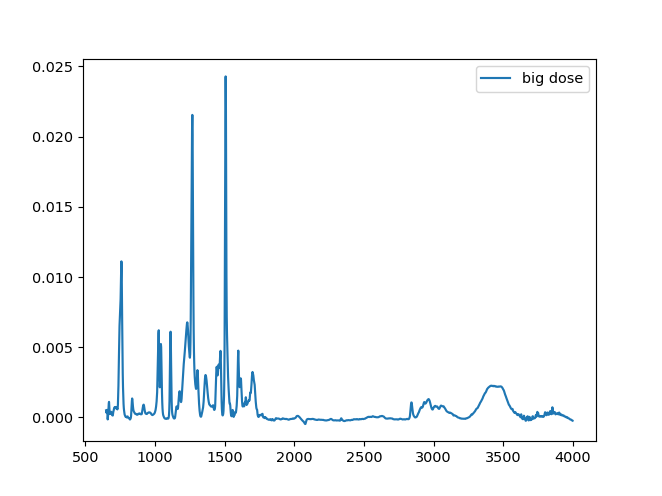

In [50]:
fig, ax = plt.subplots()
colnames = ['Wavenumber', 'Intensity']
file = 'GUA_1E-08_140 sec_big dose.0.dpt'
IR_spectra = pd.read_csv(file, '\t', header=None, names=colnames, dtype=float)
IR_spectra.set_index(colnames[0], inplace=True)
ax.plot(IR_spectra, label='big dose')
plt.legend()

In [51]:
IR_spectra.idxmax()

Intensity    1508.1
dtype: float64

<IPython.core.display.Javascript object>


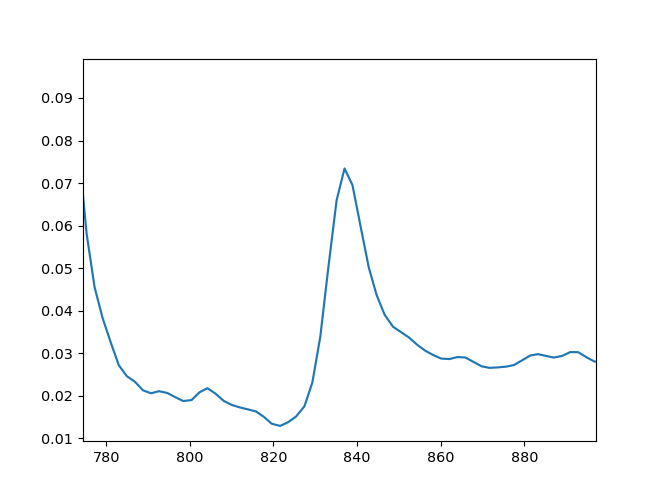

In [52]:
big = normalize_wrt(X=IR_spectra,x_max_val=np.max(IR_spectra))
fig2, ax2 = plt.subplots()
ax2.plot(big, label='normalized')

In [53]:
os.listdir()

['GUA_1E-08_120 sec_big dose.0.dpt',
 'GUA_1E-08_140 sec_big dose.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 100 K.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 191 K.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 249 K.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 337 K.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 391 K.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 575 K.0.dpt',
 'GUA_8e-09_90 sec _seq anneal_anneal to 800 K.0.dpt',
 'IR.xlsx']

100 K IR spectra of GUA adsorbed on Pt(100)

<IPython.core.display.Javascript object>


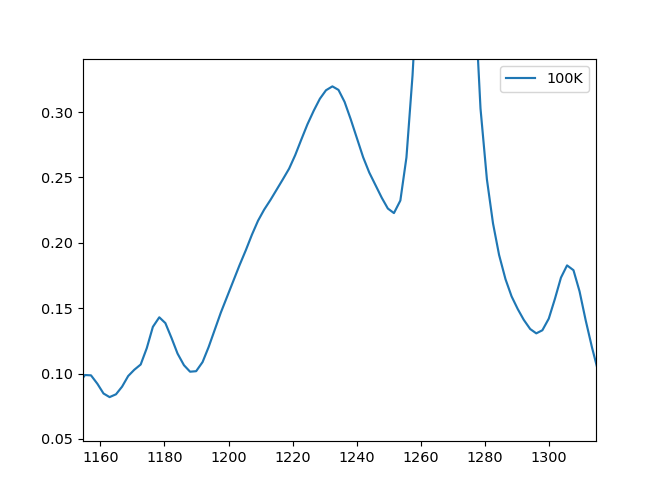

In [64]:
file1 = 'GUA_8e-09_90 sec _seq anneal_anneal to 100 K.0.dpt'
# fig3, ax3 = plt.subplots()
colnames = ['Wavenumber', 'Intensity']
IR_spectra100 = pd.read_csv(file1, '\t', header=None, names=colnames, dtype=float)
IR_spectra100.set_index(colnames[0], inplace=True)
# ax3.plot(IR_spectra, label='100 K')


K100 = normalize_wrt(X=IR_spectra100,x_max_val=np.max(IR_spectra100))
fig3, ax3 = plt.subplots()
ax3.plot(K100, label='100K')
plt.legend()

In [63]:
# fig4, ax4 = plt.subplots()
# # plot the ratio of the 100 K spectrum and the big spectrum
# ax4.plot(K100/big)
# print((K100/big))

Let's try this again with the 191 K spectrum

<IPython.core.display.Javascript object>


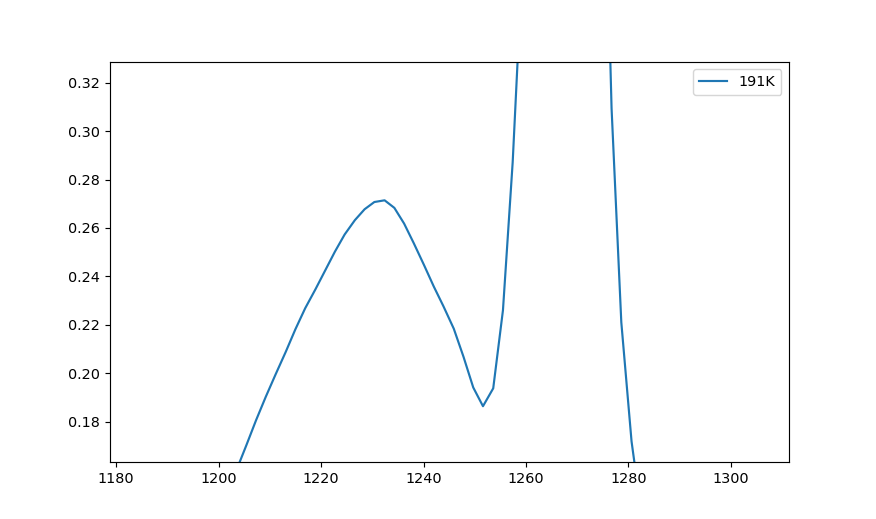

In [56]:
file3 =  'GUA_8e-09_90 sec _seq anneal_anneal to 191 K.0.dpt'
# fig3, ax3 = plt.subplots()
colnames = ['Wavenumber', 'Intensity']
IR_spectra191 = pd.read_csv(file3, '\t', header=None, names=colnames, dtype=float)
IR_spectra191.set_index(colnames[0], inplace=True)
# ax3.plot(IR_spectra, label='100 K')

K191 = normalize_wrt(X=IR_spectra191,x_max_val=np.max(IR_spectra191))
fig5, ax5 = plt.subplots()
ax5.plot(K191, label='191K')
plt.legend()

In [62]:
# fig6, ax6 = plt.subplots()
# plot the ratio of the 191 K spectrum and the big spectrum
# ax6.plot(K191/big)

<IPython.core.display.Javascript object>


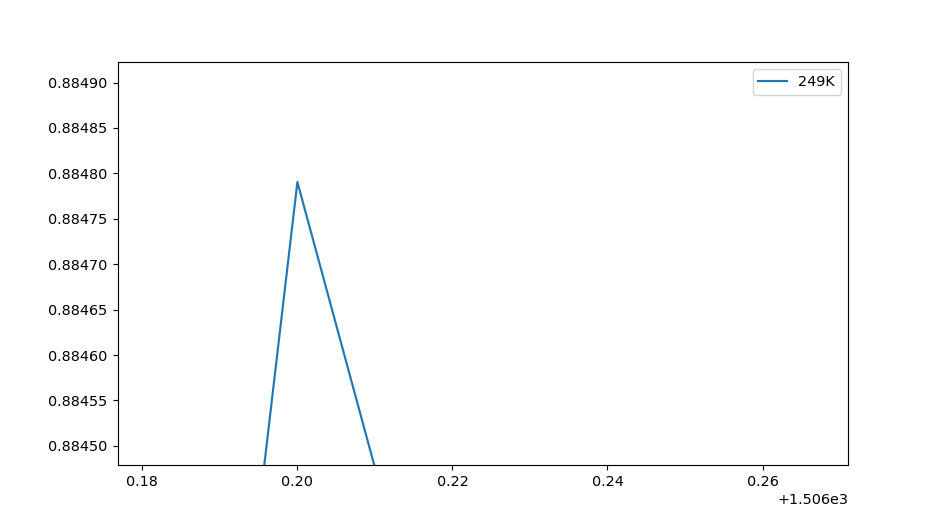

In [59]:
file4 = 'GUA_8e-09_90 sec _seq anneal_anneal to 249 K.0.dpt'

colnames = ['Wavenumber', 'Intensity']
IR_spectra249 = pd.read_csv(file4, '\t', header=None, names=colnames, dtype=float)
IR_spectra249.set_index(colnames[0], inplace=True)

K249 = normalize_wrt(X=IR_spectra249,x_max_val=np.max(IR_spectra249))
fig7, ax7 = plt.subplots()
ax7.plot(K249, label='249K')
plt.legend()

In [60]:

bCCO_191 = K191.loc[744.4]
K191.iloc[1680:1695]
# nCC_191 = K191.loc[1508.1]
# K191.loc[1508.1]
# df.loc[df['favcount'].argmax(), 'sn']
# K191.max(axis=1).idxmax()
# K191.max(axis=0)

,Intensity
Wavenumber,
757.9,0.391769
756.0,0.343718
754.1,0.305002
752.1,0.284121
750.2,0.277000
748.3,0.274610
746.4,0.265100
744.4,0.243524
742.5,0.210439


In [61]:
K191.loc[lambda x: ]

SyntaxError: invalid syntax (<ipython-input-61-18d0106cef22>, line 1)